In [104]:
import requests
import numpy as np
import pandas as pd
import os
import seaborn as sns



#pd.set_option('display.max_rows', None) displays whole list
fastfood = pd.read_csv("../Project/FastFoodRestaurants.csv")

#dropping columns: address, country, keys, latitude, longitude, postalCode, and websites
fastfood2 = fastfood.drop(['address', 'country', 'keys', 'latitude', 'longitude', 'postalCode', 'websites'], axis=1)

#Dropping columns, but not lat and long
fastfood3 = fastfood.drop(['address', 'country', 'keys', 'postalCode', 'websites'], axis=1)

In [17]:
#number of fast-food restaurants in dataset
print("There are", fastfood['name'].nunique(), "fast-food restaurants in this dataset")

There are 429 fast-food restaurants in this dataset


In [18]:
#(number of rows, columns)
fastfood.shape

(10000, 10)

In [52]:
x = fastfood3.iloc[:,1:3] 
x

,latitude,longitude
0,44.921300,-74.890210
1,39.532550,-83.445260
2,38.627360,-83.791410
3,44.950080,-74.845530
4,39.351550,-82.097280
...,...,...
9995,33.415257,-82.024531
9996,42.217300,-88.255800
9997,40.189190,-105.101720
9998,33.788640,-116.482150


In [19]:
#.head() is used for testing purposes and shows the first 5 rows in dataset
# add a number in () for number of rows to display

fastfood3.head()

,city,latitude,longitude,name,province
0,Massena,44.92130,-74.89021,McDonalds,NY
1,Washington Court House,39.53255,-83.44526,Wendys,OH
2,Maysville,38.62736,-83.79141,Frisch's Big Boy,KY
3,Massena,44.95008,-74.84553,McDonalds,NY
4,Athens,39.35155,-82.09728,OMG! Rotisserie,OH


In [77]:
#Print a list of all the fast food restaurants in Atlanta, Georgia
test1 = fastfood2[fastfood2['city'].str.contains('Atlanta')]
test2 = test1[test1['province'].str.contains('GA')]
print(test2)

         city                                   name province
1259  Atlanta  Bojangles' Famous Chicken 'n Biscuits       GA
2357  Atlanta                            Burger King       GA
2859  Atlanta                                  Arbys       GA
2932  Atlanta                            Burger King       GA
3100  Atlanta                               Pita Pit       GA
4559  Atlanta                          Auntie Anne's       GA
4562  Atlanta                                 Wendys       GA
4686  Atlanta                          Dominos Pizza       GA
4688  Atlanta                      Papa John's Pizza       GA
4689  Atlanta                              Pizza Hut       GA
4690  Atlanta                                 Subway       GA
4691  Atlanta                              Pizza Hut       GA
4692  Atlanta                           Waffle House       GA
4695  Atlanta                              Pizza Hut       GA
4696  Atlanta                            Burger King       GA
4697  At

In [82]:
#Number of each fast-food restaurant in Atlanta, GA
(test2['name'].value_counts()).to_frame(name="number of ff restaurants in ATL")

,"number of ff restaurants in ATL, GA"
McDonalds,5
Burger King,5
Dominos Pizza,3
Wendys,3
Pizza Hut,3
Arbys,2
Subway,2
Bojangles' Famous Chicken 'n Biscuits,2
Waffle House,2
Chick-Fil-A,2


Text(0, 0.5, 'Number of Fast-Food Restaurants')

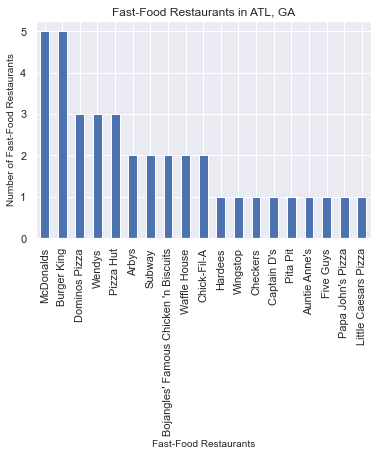

In [117]:
nameplot2 = test2['name'].value_counts()[:38].plot.bar(title="Fast-Food Restaurants in ATL, GA")
nameplot2.set_xlabel('Fast-Food Restaurants', size=10)
nameplot2.set_ylabel('Number of Fast-Food Restaurants', size=10)

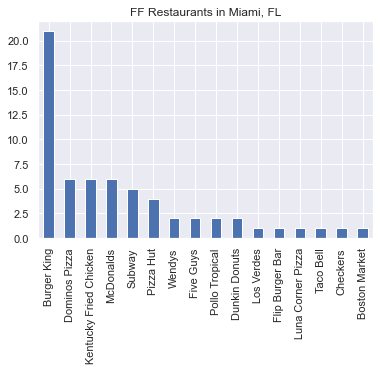

In [118]:
#FF Restaurants in miami
#There are 62 ff restaurants in Miami
miami = fastfood2[fastfood2['city'].str.contains('Miami')]
miami_florida = miami[miami['province'].str.contains('FL')]

nameplot3 = miami_florida['name'].value_counts().plot.bar(title="FF Restaurants in Miami, FL")

In [114]:
tacobell = fastfood2[fastfood2['name'].str.contains('Taco Bell')]
print(tacobell)

#there are 879 Taco Bells in the United States

             city       name province
17         Leland  Taco Bell       NC
30      Jamestown  Taco Bell       ND
56     Bennington  Taco Bell       VT
67       Sullivan  Taco Bell       MO
69         Yakima  Taco Bell       WA
...           ...        ...      ...
9828        Craig  Taco Bell       CO
9878         Nixa  Taco Bell       MO
9933  San Leandro  Taco Bell       CA
9939    Pineville  Taco Bell       NC
9956    Vancouver  Taco Bell       WA

[879 rows x 3 columns]


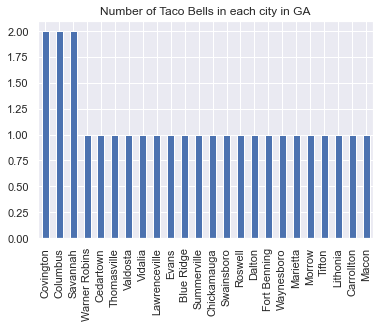

In [119]:
tacobell_ga = tacobell[tacobell['province'].str.contains('GA')]
# print(tacobell_ga)
namplot5 = tacobell_ga['city'].value_counts().plot.bar(title="Number of Taco Bells in each city in GA")


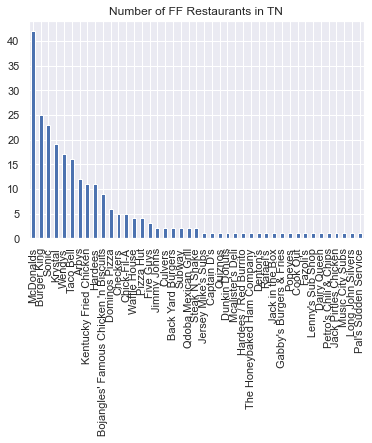

In [120]:
tn = fastfood2[fastfood2['province'].str.contains('TN')]
tn_count = tn['name'].value_counts()

nameplot4 = tn_count.plot.bar(title="Number of FF Restaurants in TN")


In [70]:
#This shows the top 5 states with the most restaurants

(fastfood['province'].value_counts().head(5)).to_frame(name="States with Most Number of Restaurants")


,States with Most Number of Restaurants
CA,676
TX,634
OH,543
FL,471
IN,379


In [22]:
# Checks for top 5 highest number of restaurants in each city
(fastfood['city'].value_counts().head(5)).to_frame(name="Top 5 Cities with Most Restaurants")

,Top 5 Cities with Most Restaurants
Cincinnati,119
Las Vegas,72
Houston,63
Miami,58
Denver,52


In [23]:
# Checks for highest number of restaurants
popularRest = fastfood['name'].value_counts()
(popularRest.head(10)).to_frame(name="Top 10 Most Fast-Food Restaurants in the US")

,Top 10 Most Fast-Food Restaurants in the US
McDonalds,2120
Burger King,1155
Taco Bell,873
Wendys,735
Arbys,521
Kentucky Fried Chicken,451
Subway,412
Sonic,399
Dominos Pizza,359
Jack in the Box,202


In [24]:
#Organizes data showing city, country, name of restaurant, and province

fastfood = fastfood[['city', 'country', 'name', 'province']]
fastfood.head() #change this by removing .head()

,city,country,name,province
0,Massena,US,McDonalds,NY
1,Washington Court House,US,Wendys,OH
2,Maysville,US,Frisch's Big Boy,KY
3,Massena,US,McDonalds,NY
4,Athens,US,OMG! Rotisserie,OH


In [25]:
# What fast food restaurants are represented in this dataset?
#uses numpy to find unique city names
# converts numpy array to panda dataframe
restaurants = fastfood.name.unique()
#restaurants
df = pd.DataFrame(restaurants, columns=['Fast-Food Restaurants'])
df.head() #try to print all #replace with 429 in head
#print(type(df))


,Fast-Food Restaurants
0,McDonalds
1,Wendys
2,Frisch's Big Boy
3,OMG! Rotisserie
4,Dominos Pizza


In [26]:
# Cities with most Taco Bell's - not finished
#fastfood_frequency = fastfood.name.value_counts().to_frame().reset_index().rename(columns={"name": "ff_counts", "index": "name"})
#fastfood.loc[(fastfood['name'] == 'Taco Bell') & (fastfood['province'] == 'GA')]


In [27]:
# This import is for graphs
import matplotlib.pyplot as plt
from matplotlib import patheffects



Text(0, 0.5, 'Number of Fast-Food Restaurants')

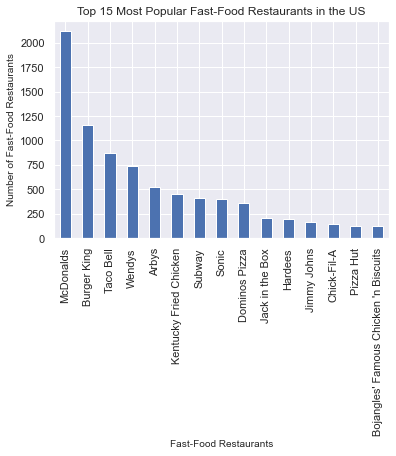

In [121]:
# Top 15 restaurants recorded by count total

nameplot = fastfood['name'].value_counts()[:15].plot.bar(title='Top 15 Most Popular Fast-Food Restaurants in the US')
nameplot.set_xlabel('Fast-Food Restaurants', size=10)
nameplot.set_ylabel('Number of Fast-Food Restaurants', size=10)

There are 2775 cities in this dataset


Text(0, 0.5, 'NUMBER OF FAST-FOOD RESTAURANTS')

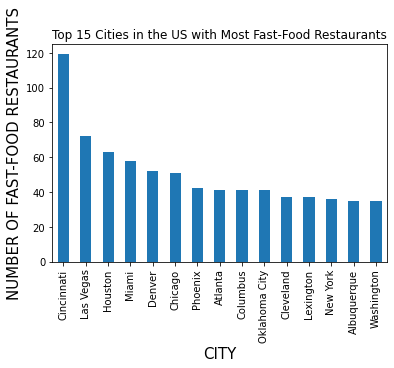

In [29]:
#Cities with the most fast food restauranta

print("There are", fastfood['city'].nunique(), 'cities in this dataset')

nameplot=fastfood['city'].value_counts()[:15].plot.bar(title='Top 15 Cities in the US with Most Fast-Food Restaurants')
nameplot.set_xlabel('CITY', size=15)
nameplot.set_ylabel('NUMBER OF FAST-FOOD RESTAURANTS', size=15)

In [30]:
# # pie chart for
# for city in top5_cities:
#     counts, labels = create_pie_chart_data(city)
#     print(labels[:5], "are the top five most popular restaurants in", city)
#     plot_pie_chart(counts, labels, city)

There are 52 states in this dataset


Text(0, 0.5, 'NUMBER OF FAST-FOOD RESTAURANTS')

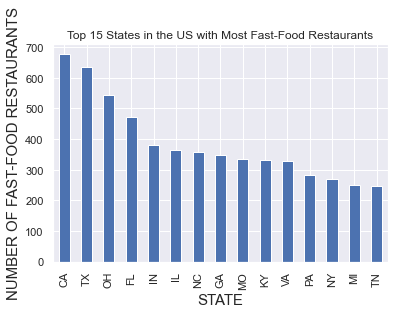

In [50]:
#States with the most fast food restauranta

print("There are", fastfood['province'].nunique(), 'states in this dataset')

nameplot=fastfood['province'].value_counts()[:15].plot.bar(title='Top 15 States in the US with Most Fast-Food Restaurants')
nameplot.set_xlabel('STATE', size=15)
nameplot.set_ylabel('NUMBER OF FAST-FOOD RESTAURANTS', size=15)

Text(0, 0.5, 'NUMBER OF FAST-FOOD RESTAURANTS')

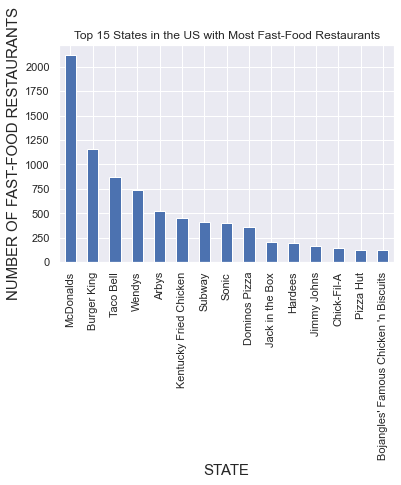

In [51]:
#States with the most fast food restauranta
nameplot=fastfood['name'].value_counts()[:15].plot.bar(title='Top 15 States in the US with Most Fast-Food Restaurants')
nameplot.set_xlabel('STATE', size=15)
nameplot.set_ylabel('NUMBER OF FAST-FOOD RESTAURANTS', size=15)

In [31]:
# count, mean, standard deviation, min, etc of # of fast-food restaurants in the different cities in the US
stat_city = fastfood['city'].value_counts()
stat_city.describe()

#There are alot of cities with 1-4 fast-food restaurants

count    2775.000000
mean        3.603604
std         5.761605
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max       119.000000
Name: city, dtype: float64

<AxesSubplot:>

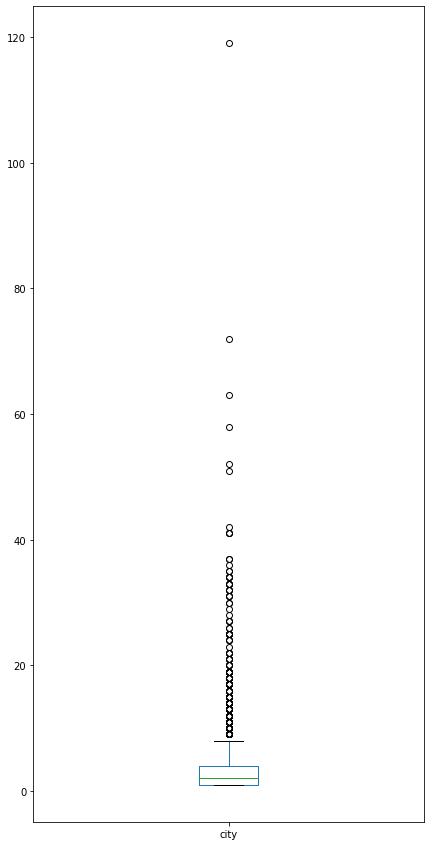

In [32]:
#box plot
stat_city.plot.box(figsize=(7,15))

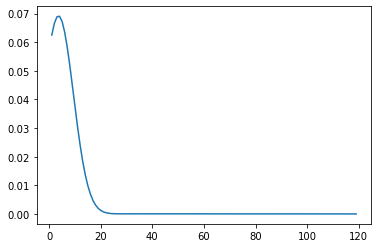

In [33]:
#normal distribution plot
from scipy.stats import norm
import statistics

mean = statistics.mean(stat_city)
sd = statistics.stdev(stat_city)

plt.plot(stat_city, norm.pdf(stat_city, mean, sd))
plt.show()

In [34]:
stat_city2 = fastfood['province'].value_counts()

stat_city2.describe()

count     52.000000
mean     192.307692
std      155.515277
min        5.000000
25%       89.500000
50%      154.500000
75%      255.500000
max      676.000000
Name: province, dtype: float64

<AxesSubplot:>

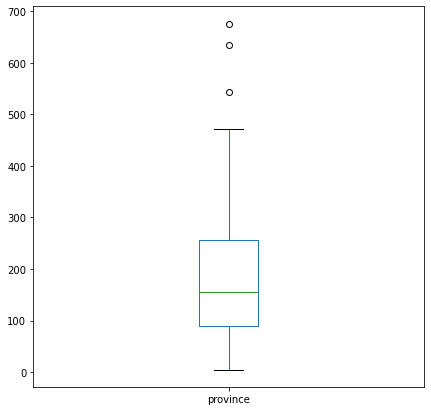

In [35]:
#box plot
stat_city2.plot.box(figsize=(7,7))

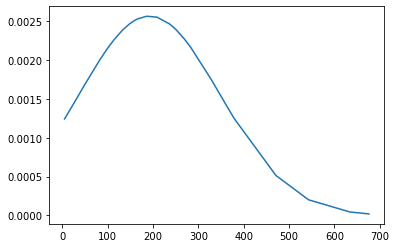

In [36]:
#normal distribution plot
mean2 = statistics.mean(stat_city2)
sd2 = statistics.stdev(stat_city2)

plt.plot(stat_city2, norm.pdf(stat_city2, mean2, sd2))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

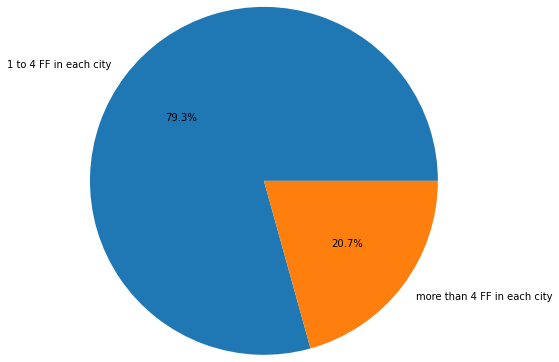

In [39]:
#pie chart
#79.3% of fast-food restaurants only has 1-4 fast food restaurants

fig, ax = plt.subplots()

lessThanFive_city = len(stat_city[stat_city < 5])
greaterThanFive_city = fastfood['city'].nunique()-lessThanFive_city

values = [lessThanFive_city, greaterThanFive_city]

ax.pie(values, labels=['1 to 4 FF in each city', "more than 4 FF in each city"], autopct='%.1f%%', radius=2, explode=(0, 0))

ax.set_aspect('equal')

#fix this
ax.set_title("")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

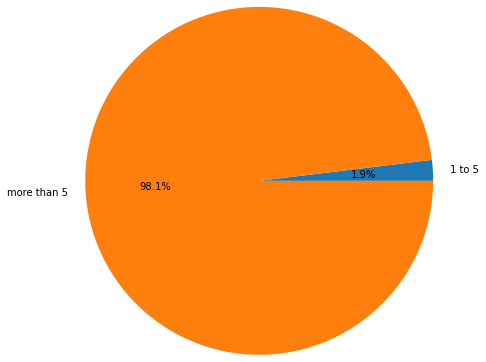

In [43]:
#pie chart
fig, ax = plt.subplots()

lessThanFive_city2 = len(stat_city2[stat_city2 < 6])
greaterThanFive_city2 = fastfood['province'].nunique()-lessThanFive_city2

values = [lessThanFive_city2, greaterThanFive_city2]

ax.pie(values, labels=['1 to 5', "more than 5"], autopct='%.1f%%', radius=2, explode=(0, 0))

ax.set_aspect('equal')

#fix this
ax.set_title("")
plt.show

In [44]:
#circle segment
import math
import matplotlib as mpl

#number of observations
r = fastfood2.shape[0]

#number of variables (slices)
var = fastfood2.shape[1]

#variable NAmes
columns = fastfood2.columns

In [45]:
# Top five cities with most fast food restaurants

top5_cities = fastfood['city'].value_counts()[:5].index.tolist()

top5_cities[:5]

['Cincinnati', 'Las Vegas', 'Houston', 'Miami', 'Denver']

In [46]:
# Top five states with most fast food restaurants

top5_states = fastfood['province'].value_counts()[:5].index.tolist()

top5_states[:5]

['CA', 'TX', 'OH', 'FL', 'IN']

In [47]:
import seaborn as sns
import statsmodels.api as sm
sns.set()
from sklearn.cluster import KMeans
from pandas import DataFrame

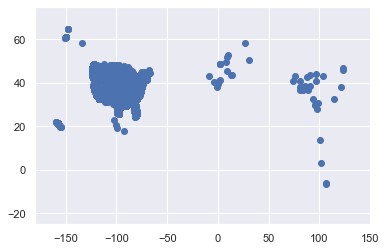

In [48]:
plt.scatter(fastfood3['longitude'], fastfood3['latitude'])
plt.xlim(-180, 150)
plt.ylim(-25,75)
plt.show()